# Logistic Regression approach

We try Logistic Regression with 'lbfgs' option, which stands for "Limited-memory Broyden–Fletcher–Goldfarb–Shanno Algorithm"

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.linear_model import LogisticRegression

In [2]:
def accuracy(true, predicted): 
    return np.sum(true==predicted)/len(predicted)

In [4]:
def lr_tester_Kfold(data, K):
    '''
    input: data = our food dataframe
            K = number of folds for the K-fold validation
    output: accuracy after K-fold run of LogisticRegression 
    '''
    skf = StratifiedKFold(n_splits=K,shuffle=True,random_state=429)

    # max_iter = 400 to suppress convergence warnings
    clf = LogisticRegression(random_state=429,solver='lbfgs', max_iter=400) 

    X_train = data.drop(columns=['id','cuisine'])
    y_train = data['cuisine']

    accuracy_list = [] 
  
    for train_idx, test_idx in skf.split(X_train,y_train):
        X = X_train.iloc[train_idx].values
        y = y_train.iloc[train_idx].values
        X_holdout = X_train.iloc[test_idx].values
        y_holdout = y_train.iloc[test_idx].values
        clf.fit(X,y)
        predictions = clf.predict(X_holdout)
        score = accuracy(y_holdout,predictions)
        accuracy_list.append(score)
    
    score = np.mean(accuracy_list)
    return score

In [7]:
kwd = pd.read_csv('key_words_data.csv')

In [8]:
acc_kwd = lr_tester_Kfold(kwd,5)

In [9]:
print(acc_kwd)

0.7141851788576268


In [10]:
tt = pd.read_csv('train_trimmed.csv')

In [11]:
acc_tt = lr_tester_Kfold(tt,5)

In [12]:
print(acc_tt)

0.747573892433346


### Summary

Accuracy for "key_words_data.csv": 0.7141851788576268

Accuracy for "train_trimmed.csv": 0.747573892433346

## Confusion matrix

We make the confusion matrix for a one-time run.

In [19]:
from sklearn.metrics import confusion_matrix
from seaborn import heatmap
cuisine_list = [
 'italian',
 'mexican',
 'southern_us',
 'indian',
 'chinese',
 'french',
 'cajun_creole',
 'thai',
 'japanese',
 'greek',
 'spanish',
 'korean',
 'vietnamese',
 'moroccan',
 'british',
 'filipino',
 'irish',
 'jamaican',
 'russian',
 'brazilian'] #Sorted by frequency

def lr_tester(data_train,data_test):
    X_train = data_train.drop(columns=['id','cuisine'])
    y_train = data_train['cuisine']
    y_test = data_test.drop(columns=['id','cuisine'])
    clf = LogisticRegression(random_state=429,solver='lbfgs', max_iter=400)
    clf.fit(X_train,y_train)
    prediction = clf.predict(y_test)
    acc = accuracy(data_test['cuisine'],prediction)
    cm=confusion_matrix(data_test['cuisine'],prediction,labels=cuisine_list) #Confusion matrix
    return acc,cm

In [21]:
kwd_train, kwd_test = train_test_split(kwd, 
                                       random_state=429,
                                       shuffle = True,
                                       test_size = 0.2,
                                       stratify = kwd.cuisine)

In [22]:
acc1,cm1 = lr_tester(kwd_train,kwd_test)

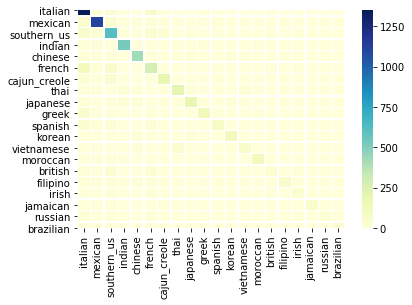

In [24]:
ax = heatmap(cm1, linewidth=0.5, cmap="YlGnBu",xticklabels = cuisine_list,yticklabels = cuisine_list)

In [26]:
tt_train, tt_test = train_test_split(tt, 
                                       random_state=429,
                                       shuffle = True,
                                       test_size = 0.2,
                                       stratify = tt.cuisine)

In [27]:
acc2,cm2 = lr_tester(tt_train,tt_test)

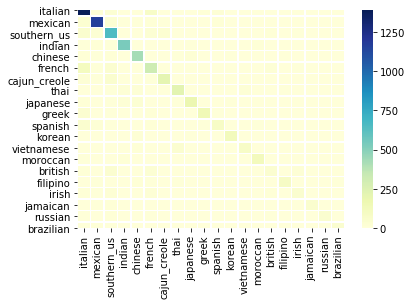

In [28]:
ax2 = heatmap(cm2, linewidth=0.5, cmap="YlGnBu",xticklabels = cuisine_list,yticklabels = cuisine_list)